*PREGUNTAS A RESOLVER*

1. ¿Cuántas personas se inscribieron la carrera de 10k de Avianca? 
1. ¿Cuántas personas terminaron la carrera de 10k de Avianca? 
1. ¿Cuantos hombres corrieron la carrera de 10k de Avianca? 
1. ¿Cuántas mujeres corrieron la carrera de 10k de Avianca? 
1. ¿Cuantos hombres corrieron la carrera de 10k de Avianca en cada categoría? 
1. ¿Cuántas mujeres corrieron la carrera de 10k de Avianca en cada categoría? 
1. ¿Cuáles fueron los tiempos más rápidos por categoría? 
1. ¿Cuáles fueron los tiempos más lentos por categoría? 
1. ¿Tiempo promedio por género? 
1. ¿Tiempo promedio por género y por categoría? 
1. ¿Cuál es la diferencia promedio de los tiempos con chip vs tiempo oficial? 
1. ¿Cuántas personas no terminaron la carrera? 
1. ¿Cuántas personas fueron descalificadas en la carrera? 
1. ¿Cuantos hombres de la categoría abierta tuvieron tiempos dentro de los límites de la categoría elite? 
1. ¿Cuántas mujeres de la categoría abierta tuvieron tiempos dentro de los límites de la categoría elite? 

1. How many people signed up for the 10k Avianca race?
1. How many people finished the 10k Avianca race?
1. How many men ran the Avianca 10k race?
1. How many women ran the Avianca 10k race?
1. How many men ran the Avianca 10k race in each category?
1. How many women ran the Avianca 10k race in each category?
1. What were the fastest times by category?
1. What were the slowest times by category?
1. Average time by gender?
1. Average time by gender and category?
1. What is the average difference of chip times vs. official time?
1. How many people did not finish the race?
1. How many people were disqualified in the race?
1. How many men in the open category had times within the limits of the elite category?
1. How many women in the open category had times within the boundaries of the elite category?

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv('Base_de_datos/registros.csv')

In [26]:
data.head()

,Numero_competencia,Posicion_general,Posicion_grupo,Tiempo_carrera,Tiempo_Chip,Categorial,Genero
0,1,59,7,00:38:17,00:38:17,Elite,Femenino
1,2,146,8,00:42:10,00:42:08,Elite,Femenino
2,3,8524,10,DNS,DNS,Elite,Femenino
3,4,30,2,00:35:35,00:35:35,Elite,Femenino
4,5,8525,11,DNS,DNS,Elite,Femenino


In [27]:
data_filter = data
data_filter = data_filter[(data_filter['Tiempo_Chip'] != 'DNS') & (data_filter['Tiempo_Chip'] != 'DSQ') & (data_filter['Tiempo_Chip'] != 'DNF')]
data_filter['Tiempo_Chip'] = pd.to_datetime(data_filter['Tiempo_Chip'] , format='%H:%M:%S')
data_filter['Tiempo_carrera'] = pd.to_datetime(data_filter['Tiempo_carrera'], format='%H:%M:%S')

**Solution 1**

In [29]:
data['Tiempo_Chip'].count()

9674

**Solution 2**

In [30]:
data_filter['Tiempo_Chip'].count()

8523

**Solution 3**

In [31]:
data_filter[data_filter['Genero']== 'Masculino']['Tiempo_Chip'].count()

5180

**Solution 4**

In [32]:
data_filter[data_filter['Genero']== 'Femenino']['Tiempo_Chip'].count()

3339

**Solution 5**

In [33]:
data_filter[data_filter['Genero']== 'Masculino'].groupby('Categorial')['Tiempo_Chip'].count()

Categorial
Abierta    3114
Elite        19
Master     1096
Plus        951
Name: Tiempo_Chip, dtype: int64

**Solution 6**

In [34]:
data_filter[data_filter['Genero']== 'Femenino'].groupby('Categorial')['Tiempo_Chip'].count()

Categorial
Abierta    2493
Elite         9
Master      542
Plus        295
Name: Tiempo_Chip, dtype: int64

**Solution 7**

In [35]:
data_filter[data_filter['Genero']== 'Masculino'].groupby('Categorial')['Tiempo_Chip'].min()

Categorial
Abierta   1900-01-01 00:32:10
Elite     1900-01-01 00:30:35
Master    1900-01-01 00:35:26
Plus      1900-01-01 00:34:55
Name: Tiempo_Chip, dtype: datetime64[ns]

**Solution 8**

In [36]:
data_filter[data_filter['Genero']== 'Femenino'].groupby('Categorial')['Tiempo_Chip'].min()

Categorial
Abierta   1900-01-01 00:41:36
Elite     1900-01-01 00:35:29
Master    1900-01-01 00:43:40
Plus      1900-01-01 00:45:23
Name: Tiempo_Chip, dtype: datetime64[ns]

**Solution 9**

In [47]:
['gender: {}, Average time: {}'.format(i[0], i[1].mean()) for i in data_filter.groupby('Genero')['Tiempo_Chip']]

['gender: Femenino, Average time: 1900-01-01 01:12:35.986818304',
 'gender: Masculino, Average time: 1900-01-01 01:01:29.232239360',
 'gender: Sin Datos, Average time: 1900-01-01 01:10:14.249999872']

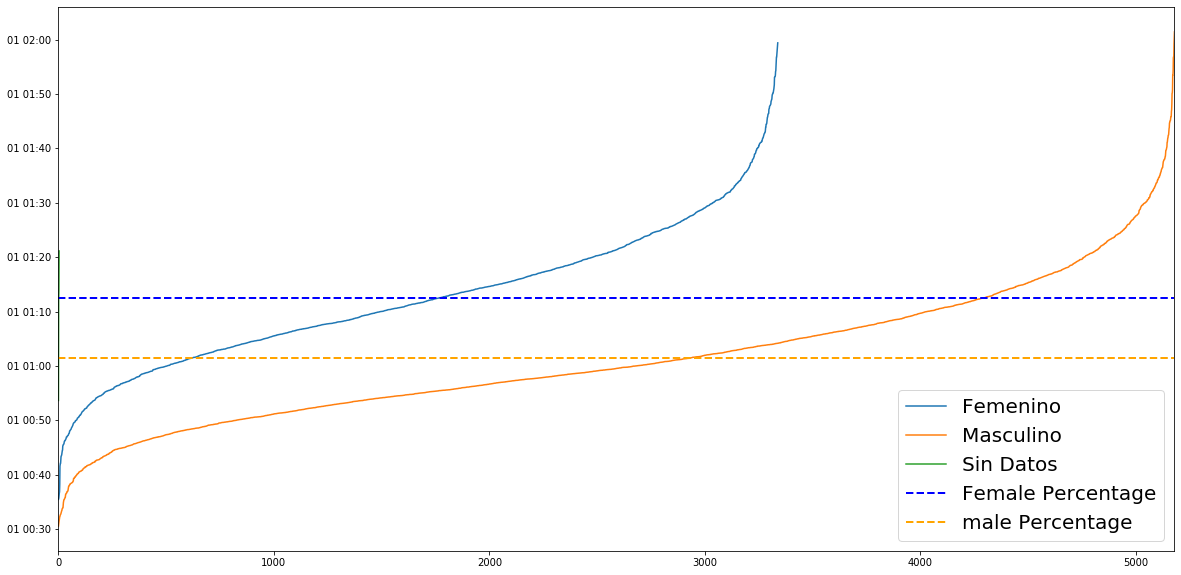

In [48]:
plt.figure(figsize=(20,10))
[i[1].sort_values().reset_index(drop=True).plot(label=i[0]) for i in data_filter.groupby('Genero')['Tiempo_Chip']]
means = [i[1].mean() for i in data_filter.groupby('Genero')['Tiempo_Chip']]

plt.axhline(means[0], color='Blue', lw=2, ls='--', label='Female Percentage')
plt.axhline(means[1], color='Orange', lw=2, ls='--', label='male Percentage')

plt.legend(loc='lower right', prop={'size': 20})

**Solution 10**

In [49]:
['category: {}, gender: {}, Average time: {}'.format(i[0][0], i[0][1], i[1].mean()) for i in data_filter.groupby(['Categorial','Genero'])['Tiempo_Chip']]

['category: Abierta, gender: Femenino, Average time: 1900-01-01 01:12:16.302044160',
 'category: Abierta, gender: Masculino, Average time: 1900-01-01 01:01:07.033716480',
 'category: Elite, gender: Femenino, Average time: 1900-01-01 00:41:00.444444416',
 'category: Elite, gender: Masculino, Average time: 1900-01-01 00:34:02.684210432',
 'category: Master, gender: Femenino, Average time: 1900-01-01 01:12:51.112546816',
 'category: Master, gender: Masculino, Average time: 1900-01-01 01:01:14.316607232',
 'category: Plus, gender: Femenino, Average time: 1900-01-01 01:15:52.379663104',
 'category: Plus, gender: Masculino, Average time: 1900-01-01 01:03:32.006309120',
 'category: Sin Datos, gender: Sin Datos, Average time: 1900-01-01 01:10:14.249999872']

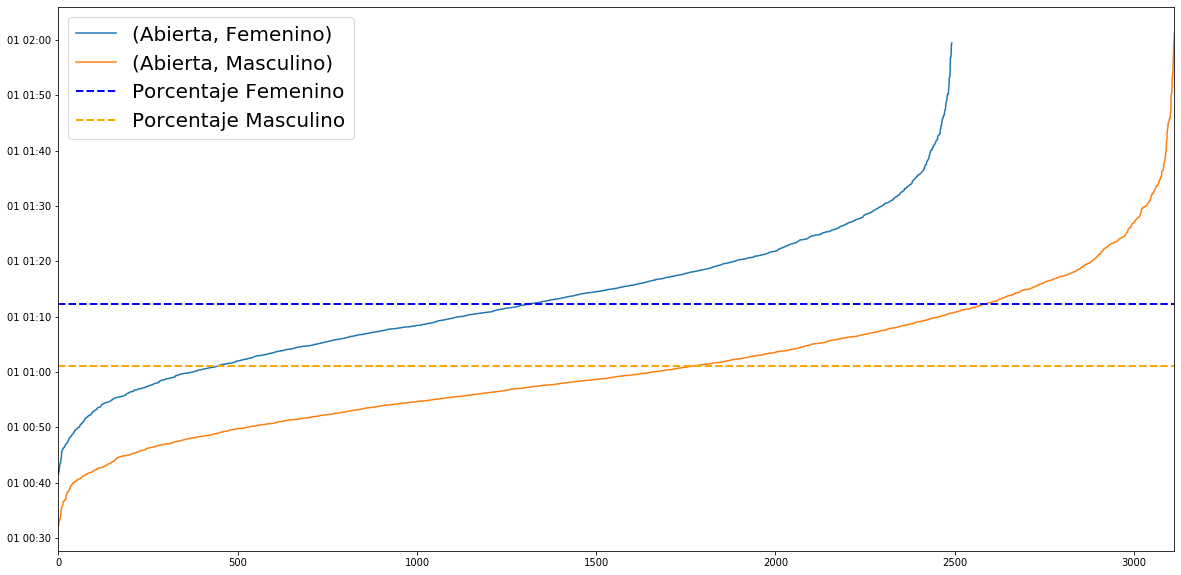

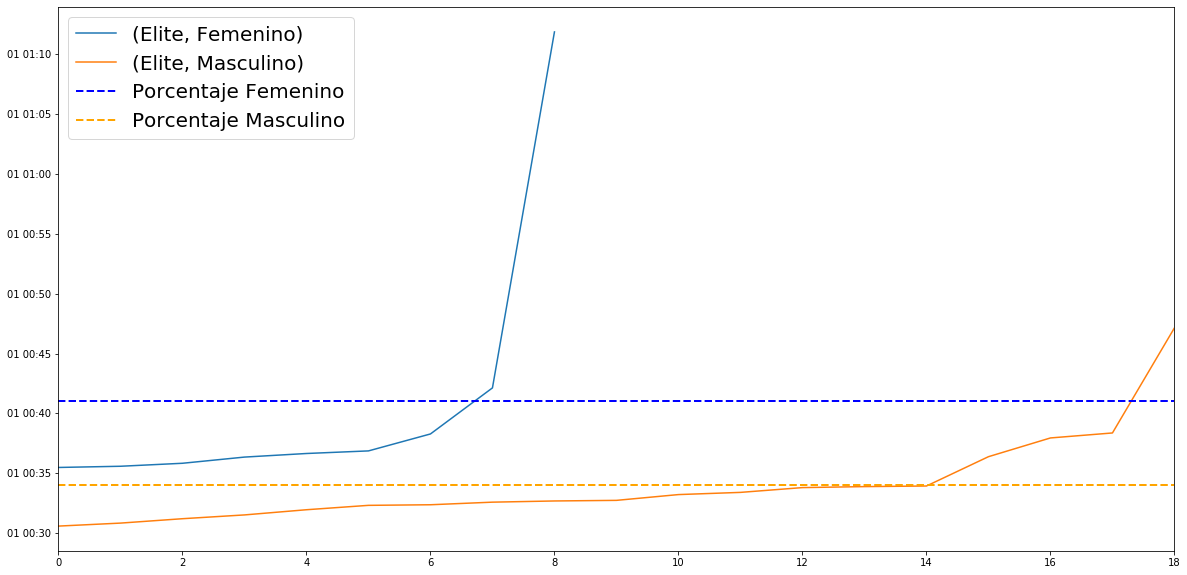

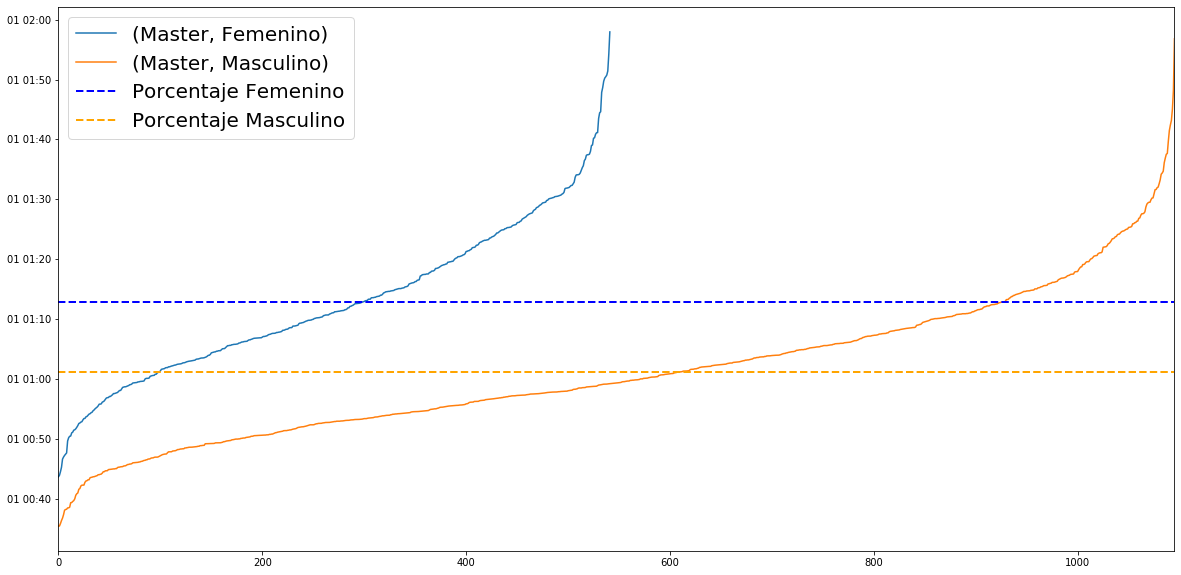

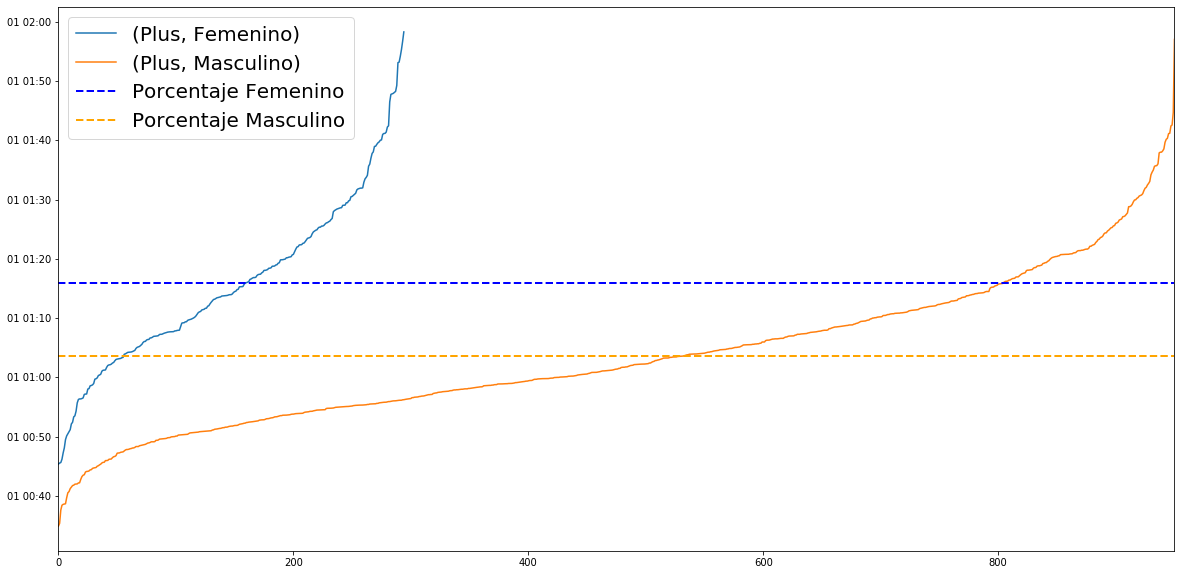

In [40]:
for category in ['Abierta', 'Elite', 'Master', 'Plus']:    
    plt.figure(figsize=(20,10))
    [i[1].sort_values().reset_index(drop=True).plot(label=i[0]) for i in data_filter.groupby(['Categorial','Genero'])['Tiempo_Chip'] if i[0][0] == category]
    means = [i[1].mean() for i in data_filter.groupby(['Categorial','Genero'])['Tiempo_Chip'] if i[0][0] == category]

    plt.axhline(means[0], color='Blue', lw=2, ls='--', label='Female Percentage')
    plt.axhline(means[1], color='Orange', lw=2, ls='--', label='Porcentaje Masculino')

    plt.legend(loc='upper left', prop={'size': 20})

**Solution 11**

In [41]:
time = data_filter['Tiempo_carrera'].mean() - data_filter['Tiempo_Chip'].mean()
'Hours: {} Minutes:{} Seconds:{}'.format(int(time.total_seconds()/3600), int(time.total_seconds()/60), time.total_seconds() - int(time.total_seconds()/60)*60)

'Hours: 0 Minutes:6 Seconds:7.547222271999999'

**Solution 12**

In [42]:
data[data['Tiempo_Chip'] == 'DNF']['Tiempo_Chip'].count()

48

**Solution 13**

In [43]:
data[data['Tiempo_Chip'] == 'DSQ']['Tiempo_Chip'].count()

18

**Solution 14**

In [44]:
maximo = data_filter[(data_filter['Categorial'] == 'Elite') & (data_filter['Genero'] == 'Masculino')]['Tiempo_Chip'].max()
minimo = data_filter[(data_filter['Categorial'] == 'Elite') & (data_filter['Genero'] == 'Masculino')]['Tiempo_Chip'].min()

data_filter[(data_filter['Categorial'] == 'Abierta') & (data_filter['Tiempo_Chip'] <= maximo) & (data_filter['Tiempo_Chip'] >= minimo)]['Tiempo_Chip'].count()

340

**Solution 15**

In [45]:
maximo = data_filter[(data_filter['Categorial'] == 'Elite') & (data_filter['Genero'] == 'Femenino')]['Tiempo_Chip'].max()
minimo = data_filter[(data_filter['Categorial'] == 'Elite') & (data_filter['Genero'] == 'Femenino')]['Tiempo_Chip'].min()

data_filter[(data_filter['Categorial'] == 'Abierta') & (data_filter['Tiempo_Chip'] <= maximo) & (data_filter['Tiempo_Chip'] >= minimo)]['Tiempo_Chip'].count()

3842